In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!git clone https://github.com/SakuraRiven/CRAFT.git

Cloning into 'CRAFT'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 54.29 KiB | 4.52 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [6]:
cd CRAFT

/content/CRAFT


In [7]:
import os
import shutil

# Create the directory structure
os.mkdir('pths')
os.chdir('pths')
os.mkdir('backbone')
os.mkdir('pretrain')
os.mkdir('ft')
os.chdir('..')


In [9]:

# Move the files
shutil.move('/content/drive/MyDrive/vgg16_bn-6c64b313.pth', 'pths/backbone/')
shutil.move('/content/drive/MyDrive/model_iter_50000.pth', 'pths/pretrain/')
shutil.move('/content/drive/MyDrive/model_iter_31600.pth', 'pths/ft/')

'pths/ft/model_iter_31600.pth'

In [10]:
# Install the required packages if the requirements file is found
if os.path.exists('CRAFT/requirements.txt'):
    !pip install -r CRAFT/requirements.txt
else:
    # Manually install known dependencies
    !pip install torch torchvision natsort opencv-python

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [18]:
import json
data = json.load(open('/content/drive/MyDrive/BSTD_v14_v2.json'))
set([key.split("_")[0] for key in data.keys()])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'}

In [19]:
from collections import Counter

In [20]:
import cv2
from google.colab.patches import cv2_imshow
import json
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,10)

In [21]:
Counter([key.split("_")[0] for key in data.keys()])

Counter({'A': 295,
         'B': 305,
         'C': 525,
         'D': 1218,
         'E': 627,
         'F': 474,
         'G': 327,
         'H': 82,
         'I': 533,
         'J': 517,
         'K': 521,
         'L': 607,
         'M': 551})

In [22]:
isClosed = True
# Blue color in BGR
color = (0, 255, 0)

# Line thickness of 2 px
thickness = 6

def plot_bounding_boxes(image, boxes,title):

    # for xmin, ymin, xmax, ymax in boxes:
    for box in boxes:
        xmin = box[0]
        ymin = box[1]
        xmax = box[2]
        ymax = box[3]
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)  # Draw rectangle

    plt.imshow(image)
    plt.title(title)
    plt.show()


def bounding_rectangle(polygon):
    """
    Find the axis-aligned bounding rectangle for a set of points.
    Returns the top-left and bottom-right coordinates of the bounding box.
    """
    # Extract the x and y coordinates from the polygon
    x_coords = [point[0] for point in polygon]
    y_coords = [point[1] for point in polygon]

    # Calculate the minimum and maximum x and y coordinates
    min_x = min(x_coords)
    max_x = max(x_coords)
    min_y = min(y_coords)
    max_y = max(y_coords)

    # Return the top-left and bottom-right coordinates of the bounding box
    return list((min_x, min_y,max_x, max_y))

def bounding_polygon(points,image):

  # Define an array of endpoints of Hexagon
  points = np.array(points)

  new_image = cv2.polylines(image, [points],isClosed, color, thickness)

  return new_image

In [23]:
def fn_rect_bbox(image_name,data):
  data_json = data[image_name]
  data_json_rect = dict()
  data_json_rect['image_name'] = data_json['image_name']
  data_json_rect['url'] = data_json['url']
  data_json_rect['bbox'] = []
  data_json_rect['transcription'] = []
  for poly in data_json['annotations'].items() :
    poly = poly[-1]
    data_json_rect['bbox'].append(bounding_rectangle(poly['coordinates']))
    data_json_rect['transcription'].append(poly['text'])

  return data_json_rect


In [32]:
for key in data.keys() :
  key = 'A_image_109'
  data_json = data[key]
  data_json_rect = dict()
  data_json_rect['image_name'] = data_json['image_name']
  data_json_rect['url'] = data_json['url']
  data_json_rect['bbox'] = []
  data_json_rect['transcription'] = []
  for poly in data_json['annotations'].items() :
    poly = poly[-1]
    data_json_rect['bbox'].append(bounding_rectangle(poly['coordinates']))
    data_json_rect['transcription'].append(poly['text'])
  break


In [33]:
data_json = data[key]
data_json

{'annotations': {'polygon_0': {'coordinates': [[1641, 198],
    [1836, 196],
    [1903, 176],
    [1941, 189],
    [1938, 293],
    [1902, 295],
    [1728, 307],
    [1694, 306],
    [1641, 303]],
   'text': 'JUBILEE',
   'script_language': 'english'},
  'polygon_1': {'coordinates': [[704, 238],
    [940, 229],
    [1013, 220],
    [1076, 222],
    [1084, 296],
    [1084, 329],
    [912, 337],
    [779, 344],
    [714, 339]],
   'text': 'FUNCTION',
   'script_language': 'english'},
  'polygon_10': {'coordinates': [[1213, 255],
    [1213, 264],
    [1214, 269],
    [1214, 281],
    [1215, 285],
    [1215, 299],
    [1214, 308],
    [1213, 311],
    [1213, 312],
    [1209, 320],
    [1204, 325],
    [1197, 331],
    [1188, 333],
    [1177, 336],
    [1175, 336],
    [1169, 337],
    [1162, 337],
    [1154, 338],
    [1133, 338],
    [1124, 337],
    [1116, 333],
    [1110, 328],
    [1105, 321],
    [1102, 312],
    [1101, 307],
    [1101, 303],
    [1100, 297],
    [1100, 289],
    [109

<ipython-input-34-13666ea51705>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(data_json_rect['url'])


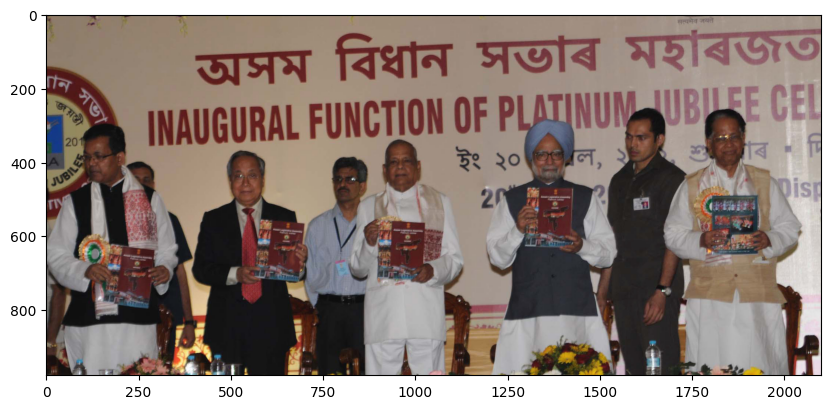

In [34]:
image = imread(data_json_rect['url'])
plt.imshow(image)

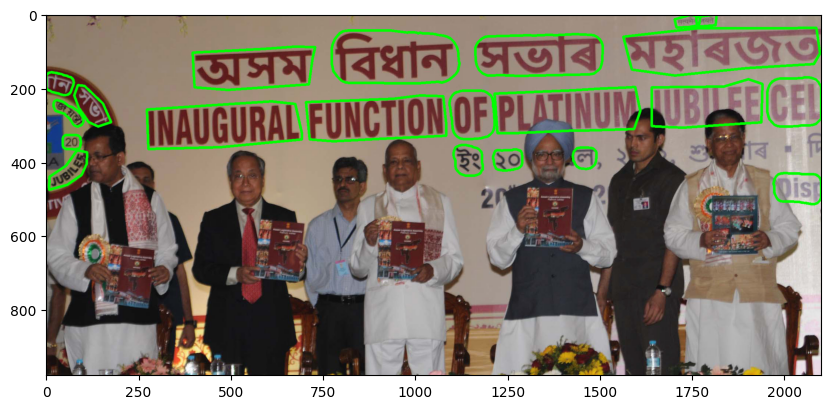

In [35]:
for poly_name in data[key]['annotations'].keys() :
  poly = data[key]['annotations'][poly_name]
  image = bounding_polygon(poly['coordinates'],image)
plt.imshow(image)

In [ ]:
import os
import json
import cv2
import numpy as np
from PIL import Image, ImageDraw
from tqdm import tqdm
import torch
from torchvision import transforms
from model import CRAFT
from google.colab.patches import cv2_imshow
from config import cfg

def bounding_rectangle(coordinates):
    x_coords = [coord[0] for coord in coordinates]
    y_coords = [coord[1] for coord in coordinates]

    min_x = min(x_coords)
    min_y = min(y_coords)
    max_x = max(x_coords)
    max_y = max(y_coords)

    return [min_x, min_y, max_x, max_y]

def load_pil(img):
    t = transforms.Compose([transforms.ToTensor(), transforms.Normalize(cfg.train.mean, cfg.train.std)])
    return t(img).unsqueeze(0)

def plot_boxes(img, boxes):
    if boxes is None:
        return img
    draw = ImageDraw.Draw(img)
    for box in boxes:
        draw.polygon([box[0], box[1], box[2], box[3], box[4], box[5], box[6], box[7]], outline=(0, 255, 0))
    return img

def resize_img(img, long_side):
    w, h = img.size
    if long_side is not None:
        if w > h:
            resize_w = long_side
            ratio = long_side / w
            resize_h = h * ratio
        else:
            resize_h = long_side
            ratio = long_side / h
            resize_w = w * ratio
    else:
        resize_h, resize_w = h, w

    final_h = int(resize_h) if resize_h % 32 == 0 else (int(resize_h / 32) + 1) * 32
    final_w = int(resize_w) if resize_w % 32 == 0 else (int(resize_w / 32) + 1) * 32
    img = img.resize((final_w, final_h), Image.BILINEAR)
    ratio_h = final_h / h
    ratio_w = final_w / w
    return img, ratio_h, ratio_w

def get_score(img, model, device):
    with torch.no_grad():
        region, affinity = model(load_pil(img).to(device))
    return list(map(lambda x: x[0][0].cpu().numpy(), [region, affinity]))

def restore_boxes(region, affinity, region_thresh, affinity_thresh, remove_thresh, ratio):
    boxes = []
    M = (region > region_thresh) + (affinity > affinity_thresh)
    ret, markers = cv2.connectedComponents(np.uint8(M * 255))
    for i in range(ret):
        if i == 0:
            continue
        y, x = np.where(markers == i)
        if len(y) < region.size * remove_thresh:
            continue
        cords = 2 * np.concatenate((x.reshape(-1, 1) / ratio[1], y.reshape(-1, 1) / ratio[0]), axis=1)
        a = np.array([cords[:, 0].min(), cords[:, 1].min(), cords[:, 0].max(), cords[:, 1].min(),
                      cords[:, 0].max(), cords[:, 1].max(), cords[:, 0].min(), cords[:, 1].max()])
        boxes.append(a)
    return boxes

def fn_craft_detection(data_json_rect, display=False):
    image = imread(data_json_rect['url'])
    img = Image.fromarray(image)
    img, ratio_h, ratio_w = resize_img(img, cfg.test.long_side)

    model_path = './pths/pretrain/model_iter_50000.pth'
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = CRAFT().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    region, affinity = get_score(img, model, device)
    boxes = restore_boxes(region, affinity, cfg.test.region_thresh, cfg.test.affinity_thresh, cfg.test.remove_thresh,
                          (ratio_h, ratio_w))

    boxes_ = []
    for box in boxes:
        startX = int(min(box[0], box[2], box[4], box[6]))
        startY = int(min(box[1], box[3], box[5], box[7]))
        endX = int(max(box[0], box[2], box[4], box[6]))
        endY = int(max(box[1], box[3], box[5], box[7]))
        boxes_.append([startX, startY, endX, endY])
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

    if display:
        cv2_imshow(image)

    return {"bbox": list(boxes_)}

def fn_rect_bbox(image_name, data):
    data_json = data[image_name]
    data_json_rect = dict()
    data_json_rect['image_name'] = data_json['image_name']
    data_json_rect['url'] = data_json['url']
    data_json_rect['bbox'] = []
    data_json_rect['transcription'] = []

    for poly in data_json['annotations'].items():
        poly = poly[-1]
        rect = bounding_rectangle(poly['coordinates'])
        if len(rect) == 4:
            try:
                data_json_rect['bbox'].append([int(rect[0]), int(rect[1]), int(rect[2]), int(rect[3])])
            except ValueError as e:
                print(f"ValueError converting rect to int for {image_name}: {e}")
        else:
            print(f"Warning: Unexpected bounding rectangle format for {image_name}")

        data_json_rect['transcription'].append(poly['text'])

    return data_json_rect

data_file_path = "/content/drive/MyDrive/BSTD_v14_v2.json"
with open(data_file_path, 'r') as file:
    data = json.load(file)

# Main processing loop
gt_dict = dict()
det_dict = dict()
error_images = []
checkpoint_interval = 20  # Set the checkpoint interval
processed_count = 0  # Track how many images have been processed

gt_file_path = "/content/drive/MyDrive/CRAFT_TEST_RESULT/gt_dict_craft_v14.json"
det_file_path = "/content/drive/MyDrive/CRAFT_TEST_RESULT/det_dict_craft_v14.json"

for image_name in tqdm(data.keys()):
    if data[image_name]["split"] != "test":
        continue

    data_json_rect = fn_rect_bbox(image_name, data)

    try:
        detection = fn_craft_detection(data_json_rect)
    except Exception as e:
        print(f"Error processing {data_json_rect['url']}: {e}")
        error_images.append(data_json_rect['url'])
        continue

    if len(detection['bbox']) > 0:
        gt_dict[image_name] = {"bbox": data_json_rect['bbox'], "transcription": data_json_rect['transcription']}
        det_dict[image_name] = detection
    else:
        gt_dict[image_name] = {"bbox": data_json_rect['bbox'], "transcription": data_json_rect['transcription']}
        det_dict[image_name] = {"bbox": [[-900, -700, -10000, -800]]}

    processed_count += 1

    # Checkpointing: save the results every checkpoint_interval images
    if processed_count % checkpoint_interval == 0:
        with open(gt_file_path, 'w') as file:
            json.dump(gt_dict, file)
        with open(det_file_path, 'w') as file:
            json.dump(det_dict, file)
        print(f"Checkpoint saved after processing {processed_count} images.")

# Final save after processing all images
with open(gt_file_path, 'w') as file:
    print(f"Writing ground truth data to {gt_file_path}")
    json.dump(gt_dict, file)

with open(gt_file_path, 'r') as file:
    gt_data = json.load(file)
    print(f"Ground truth data contains {len(gt_data)} items.")

with open(det_file_path, 'w') as file:
    print(f"Writing detection data to {det_file_path}")
    json.dump(det_dict, file)

# Read the detection file
with open(det_file_path, 'r') as file:
    det_data = json.load(file)
    print(f"Detection data contains {len(det_data)} items.")

  2%|▏         | 125/6582 [01:11<1:10:14,  1.53it/s]

Checkpoint saved after processing 20 images.


  2%|▏         | 134/6582 [01:27<2:31:30,  1.41s/it]

Error processing https://upload.wikimedia.org/wikipedia/commons/5/57/Renovated_gate_of_Tezpur_University.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


  3%|▎         | 200/6582 [02:39<3:09:29,  1.78s/it]

Checkpoint saved after processing 40 images.


  3%|▎         | 219/6582 [03:16<2:59:49,  1.70s/it]

Error processing https://upload.wikimedia.org/wikipedia/commons/5/52/Assam_Rural_Development_Bank_%E2%80%93_Regional_Office%2C_Golaghat.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


  5%|▍         | 316/6582 [04:20<50:46,  2.06it/s]  

Checkpoint saved after processing 60 images.


  7%|▋         | 434/6582 [06:01<1:50:44,  1.08s/it]

Checkpoint saved after processing 80 images.


  8%|▊         | 516/6582 [07:04<1:11:48,  1.41it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/8/8c/BAHA8_Tel_Nof_Construction_Unit_301.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


  8%|▊         | 538/6582 [07:35<2:35:11,  1.54s/it]

Checkpoint saved after processing 100 images.


  9%|▉         | 606/6582 [09:15<2:37:46,  1.58s/it]

Checkpoint saved after processing 120 images.


 11%|█         | 723/6582 [10:56<3:50:31,  2.36s/it]

Checkpoint saved after processing 140 images.


 12%|█▏        | 803/6582 [12:30<1:24:23,  1.14it/s]

Checkpoint saved after processing 160 images.


 14%|█▍        | 906/6582 [14:08<1:20:33,  1.17it/s]

Checkpoint saved after processing 180 images.


 14%|█▍        | 935/6582 [14:25<1:02:01,  1.52it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/7/71/Gujarati_matras.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 14%|█▍        | 954/6582 [14:28<36:33,  2.57it/s]  

Error processing https://upload.wikimedia.org/wikipedia/commons/2/25/Highway_gothic_font_Gujarati_letter_jha.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 15%|█▍        | 969/6582 [14:31<29:50,  3.14it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/e/e8/Highway_gothic_font_Gujarati_letter_u.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 15%|█▍        | 983/6582 [14:42<47:30,  1.96it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/5/52/Highway_gothic_font_Gujarati_letter_candra_o.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 15%|█▍        | 986/6582 [14:45<54:43,  1.70it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/8/83/Highway_gothic_font_Gujarati_letter_vocalic_ll.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 16%|█▌        | 1063/6582 [16:01<1:10:56,  1.30it/s]

Checkpoint saved after processing 200 images.


 18%|█▊        | 1156/6582 [17:36<1:45:10,  1.16s/it]

Checkpoint saved after processing 220 images.


 19%|█▉        | 1263/6582 [19:10<57:27,  1.54it/s]

Checkpoint saved after processing 240 images.


 20%|██        | 1343/6582 [20:06<1:03:42,  1.37it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/c/c4/Rohini_East_Metro_Station_03.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 21%|██        | 1394/6582 [20:39<41:48,  2.07it/s]  

Checkpoint saved after processing 260 images.


 23%|██▎       | 1483/6582 [22:08<2:53:56,  2.05s/it]

Checkpoint saved after processing 280 images.


 24%|██▍       | 1593/6582 [23:32<1:40:58,  1.21s/it]

Checkpoint saved after processing 300 images.


 26%|██▌       | 1685/6582 [24:45<58:32,  1.39it/s]  

Error processing https://upload.wikimedia.org/wikipedia/commons/e/ec/Chaitra_month_depiction_Hindu_mythology.jpg: HTTP Error 404: Not Found


 26%|██▌       | 1691/6582 [24:52<1:10:39,  1.15it/s]

Checkpoint saved after processing 320 images.


 27%|██▋       | 1751/6582 [25:48<1:03:56,  1.26it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/e/e9/University_of_delhi_logo.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 27%|██▋       | 1762/6582 [25:53<46:34,  1.72it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/c/c1/Vaishakha_month_depiction_Hindu_mythology.jpg: HTTP Error 404: Not Found


 27%|██▋       | 1802/6582 [26:21<56:48,  1.40it/s]  

Checkpoint saved after processing 340 images.


 29%|██▉       | 1913/6582 [27:50<41:21,  1.88it/s]

Checkpoint saved after processing 360 images.


 30%|███       | 1993/6582 [29:16<1:11:16,  1.07it/s]

Checkpoint saved after processing 380 images.


 32%|███▏      | 2095/6582 [30:37<58:06,  1.29it/s]

Checkpoint saved after processing 400 images.


 33%|███▎      | 2181/6582 [32:02<51:55,  1.41it/s]

Checkpoint saved after processing 420 images.


 35%|███▌      | 2306/6582 [33:30<1:08:56,  1.03it/s]

Checkpoint saved after processing 440 images.


 37%|███▋      | 2403/6582 [34:53<1:25:55,  1.23s/it]

Checkpoint saved after processing 460 images.


 38%|███▊      | 2506/6582 [36:22<39:50,  1.71it/s]

Checkpoint saved after processing 480 images.


 40%|███▉      | 2622/6582 [38:04<1:10:54,  1.07s/it]

Checkpoint saved after processing 500 images.


 40%|████      | 2643/6582 [38:36<1:28:58,  1.36s/it]

Error processing https://upload.wikimedia.org/wikipedia/commons/7/7e/Belur%2C_Hassan_district.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 41%|████      | 2694/6582 [39:31<1:05:29,  1.01s/it]

Checkpoint saved after processing 520 images.


 42%|████▏     | 2777/6582 [41:01<52:57,  1.20it/s]  

Checkpoint saved after processing 540 images.


 43%|████▎     | 2839/6582 [41:57<47:39,  1.31it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/e/e0/KC_metro_station.jpg: HTTP Error 404: Not Found


 44%|████▍     | 2905/6582 [42:31<28:02,  2.19it/s]

Checkpoint saved after processing 560 images.


 46%|████▌     | 3035/6582 [43:54<55:51,  1.06it/s]

Checkpoint saved after processing 580 images.


 48%|████▊     | 3166/6582 [45:21<38:08,  1.49it/s]

Checkpoint saved after processing 600 images.


 50%|████▉     | 3260/6582 [46:41<1:33:07,  1.68s/it]

Checkpoint saved after processing 620 images.


 51%|█████     | 3343/6582 [48:08<1:35:38,  1.77s/it]

Checkpoint saved after processing 640 images.


 52%|█████▏    | 3444/6582 [49:27<24:49,  2.11it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/b/bf/Aler_Railway_Station_Entrance.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 53%|█████▎    | 3468/6582 [49:40<25:17,  2.05it/s]

Checkpoint saved after processing 660 images.


 54%|█████▍    | 3561/6582 [51:22<1:42:12,  2.03s/it]

Checkpoint saved after processing 680 images.


 55%|█████▌    | 3644/6582 [53:00<1:02:16,  1.27s/it]

Checkpoint saved after processing 700 images.


 57%|█████▋    | 3741/6582 [54:38<31:26,  1.51it/s]

Checkpoint saved after processing 720 images.


 58%|█████▊    | 3818/6582 [56:01<46:37,  1.01s/it]

Checkpoint saved after processing 740 images.


 59%|█████▉    | 3911/6582 [57:56<1:03:38,  1.43s/it]

Checkpoint saved after processing 760 images.


 61%|██████    | 4003/6582 [59:20<31:54,  1.35it/s]

Checkpoint saved after processing 780 images.


 62%|██████▏   | 4079/6582 [1:00:59<58:29,  1.40s/it]

Checkpoint saved after processing 800 images.


 63%|██████▎   | 4121/6582 [1:02:00<45:22,  1.11s/it]

Error processing https://upload.wikimedia.org/wikipedia/commons/c/c3/Odia_Wikisource_2_-_Facebook_banner_%28784%C3%97295_px%29.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 63%|██████▎   | 4122/6582 [1:02:03<53:17,  1.30s/it]

Error processing https://upload.wikimedia.org/wikipedia/commons/1/1d/Odia_Wikisource_2_-_email_header_%28600x200_px%29.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 63%|██████▎   | 4149/6582 [1:02:38<1:08:11,  1.68s/it]

Checkpoint saved after processing 820 images.


 65%|██████▌   | 4288/6582 [1:04:07<23:45,  1.61it/s]

Checkpoint saved after processing 840 images.


 67%|██████▋   | 4399/6582 [1:05:37<28:28,  1.28it/s]

Checkpoint saved after processing 860 images.


 68%|██████▊   | 4449/6582 [1:06:11<15:44,  2.26it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/3/37/Chandigarh_in_India.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 68%|██████▊   | 4486/6582 [1:07:17<49:57,  1.43s/it]  

Checkpoint saved after processing 880 images.


 69%|██████▉   | 4571/6582 [1:08:45<39:51,  1.19s/it]

Checkpoint saved after processing 900 images.


 71%|███████▏  | 4690/6582 [1:10:14<14:52,  2.12it/s]

Checkpoint saved after processing 920 images.


 73%|███████▎  | 4806/6582 [1:11:43<17:31,  1.69it/s]

Checkpoint saved after processing 940 images.


 74%|███████▍  | 4901/6582 [1:13:14<18:59,  1.48it/s]

Checkpoint saved after processing 960 images.


 76%|███████▌  | 4986/6582 [1:14:21<13:02,  2.04it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/9/96/Salem_Corporation_Emblem.jpg: HTTP Error 404: Not Found


 76%|███████▌  | 5001/6582 [1:15:01<58:40,  2.23s/it]

Checkpoint saved after processing 980 images.


 77%|███████▋  | 5091/6582 [1:16:28<37:07,  1.49s/it]

Checkpoint saved after processing 1000 images.


 79%|███████▉  | 5188/6582 [1:17:53<15:51,  1.46it/s]

Checkpoint saved after processing 1020 images.


 81%|████████  | 5336/6582 [1:19:24<12:10,  1.71it/s]

Checkpoint saved after processing 1040 images.


 83%|████████▎ | 5471/6582 [1:20:48<05:57,  3.11it/s]

Checkpoint saved after processing 1060 images.


 85%|████████▍ | 5573/6582 [1:22:07<12:21,  1.36it/s]

Error processing https://upload.wikimedia.org/wikipedia/commons/f/f2/Entrance_Of_Platform.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0


 85%|████████▍ | 5594/6582 [1:22:19<11:07,  1.48it/s]

Checkpoint saved after processing 1080 images.


 86%|████████▌ | 5665/6582 [1:23:52<36:10,  2.37s/it]

Checkpoint saved after processing 1100 images.


 86%|████████▋ | 5686/6582 [1:24:14<16:04,  1.08s/it]

In [3]:
cd/content

/content


## Evaluation

In [4]:
!git clone https://github.com/M22AIE212/SceneDedection_Evaluation_TedEval.git

Cloning into 'SceneDedection_Evaluation_TedEval'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 11.22 KiB | 410.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


In [5]:
cd /content/SceneDedection_Evaluation_TedEval

/content/SceneDedection_Evaluation_TedEval


In [6]:
pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Created wheel for Polygon3: filename=Polygon3-3.0.9.1-cp310-cp310-linux_x86_64.whl size=117780 sha256=dd0f6e6e73a0558f704c86e6b9f58c260a83d8bbe6c23a06ab8e17cc78bdfc83
  Stored in directory: /root/.cache/pip/wheels/d8/b7/f6/b4e24f56a1cc9856dca98cc2fdc3915d7649b39b62f3dbca9e
Successfully built Polygon3


In [7]:
from evaluation import main
from itertools import compress

In [12]:
gt_dict = json.load(open("/content/drive/MyDrive/CRAFT_TEST_RESULT/gt_dict_craft_v14.json"))
det_dict = json.load(open("/content/drive/MyDrive/CRAFT_TEST_RESULT/det_dict_craft_v14.json"))

In [13]:
all_keys = list(gt_dict.keys())
all_keys[:3]

['A_image_109', 'A_image_1150', 'A_image_1166']

In [14]:
from collections import namedtuple
import importlib
import math
import numpy as np
import Polygon as plg

def default_evaluation_params():
    """
    default_evaluation_params: Default parameters to use for the validation and evaluation.
    """
    return {
            'AREA_RECALL_CONSTRAINT' : 0.4,
            'AREA_PRECISION_CONSTRAINT' :0.4,
            'EV_PARAM_IND_CENTER_DIFF_THR': 1,
            'CONFIDENCES' : False,
            'GT_LTRB': True, # LTRB: 2points(left,top,right,bottom) or 4 points(x1,y1,x2,y2,x3,y3,x4,y4)
            'DET_LTRB': True, # LTRB: 2points(left,top,right,bottom) or 4 points(x1,y1,x2,y2,x3,y3,x4,y4)
            'PER_SAMPLE_RESULTS': True, # Generate per sample results and produce data for visualization
            }

def main(gt_dict,det_dict) :

  def polygon_from_points(points):
      """
      Returns a Polygon object to use with the Polygon2 class from a list of 8 points: x1,y1,x2,y2,x3,y3,x4,y4
      """
      resBoxes=np.empty([1,8],dtype='int32')
      resBoxes[0,0]=int(points[0])
      resBoxes[0,4]=int(points[1])
      resBoxes[0,1]=int(points[2])
      resBoxes[0,5]=int(points[3])
      resBoxes[0,2]=int(points[4])
      resBoxes[0,6]=int(points[5])
      resBoxes[0,3]=int(points[6])
      resBoxes[0,7]=int(points[7])
      pointMat = resBoxes[0].reshape([2,4]).T
      return plg.Polygon( pointMat)

  def rectangle_to_polygon(rect):
      resBoxes=np.empty([1,8],dtype='int32')
      resBoxes[0,0]=int(rect.xmin)
      resBoxes[0,4]=int(rect.ymin)
      resBoxes[0,1]=int(rect.xmax)
      resBoxes[0,5]=int(rect.ymin)
      resBoxes[0,2]=int(rect.xmax)
      resBoxes[0,6]=int(rect.ymax)
      resBoxes[0,3]=int(rect.xmin)
      resBoxes[0,7]=int(rect.ymax)
      pointMat = resBoxes[0].reshape([2,4]).T
      return plg.Polygon( pointMat)

  def rectangle_to_points(rect):
      points = [int(rect.xmin), int(rect.ymax), int(rect.xmax), int(rect.ymax), int(rect.xmax), int(rect.ymin), int(rect.xmin), int(rect.ymin)]
      return points

  def polygon_to_points(pol):
      pointMat = []
      for p in pol:
          for i in range(len(p)):
              pointMat.extend(p[i])
      return pointMat

  def get_intersection(pD,pG):
      pInt = pD & pG
      if len(pInt) == 0:
          return 0
      return pInt.area()

  def compute_ap(confList, matchList,numGtCare):
      correct = 0
      AP = 0
      if len(confList)>0:
          confList = np.array(confList)
          matchList = np.array(matchList)
          sorted_ind = np.argsort(-confList)
          confList = confList[sorted_ind]
          matchList = matchList[sorted_ind]
          for n in range(len(confList)):
              match = matchList[n]
              if match:
                  correct += 1
                  AP += float(correct)/(n + 1)
          if numGtCare>0:
              AP /= numGtCare
      return AP

  def point_distance(a, b):
      distx = math.fabs(a[0] - b[0])
      disty = math.fabs(a[1] - b[1])
      return math.sqrt(distx * distx + disty * disty)

  def diag(points):
      diag1 = point_distance((points[0], points[1]), (points[4], points[5]))
      diag2 = point_distance((points[2], points[3]), (points[6], points[7]))
      return (diag1 + diag2) / 2

  def center_distance(p1, p2):
      return point_distance(p1.center(), p2.center())

  def get_midpoints(p1,p2):
      return ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)

  def get_angle_3pt(a, b, c):
      """Counterclockwise angle in degrees by turning from a to c around b
          Returns a float between 0.0 and 360.0"""
      ang = math.degrees(
          math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
      return ang + 360 if ang < 0 else ang

  def gtBoxtoChars(num, points):
      chars = []
      assert len(points) == 8
      p1 = get_midpoints([points[0],points[1]], [points[6],points[7]])
      p2 = get_midpoints([points[2],points[3]], [points[4],points[5]])
      unitx = (p2[0] - p1[0]) / num
      unity = (p2[1] - p1[1]) / num
      for i in range(num):
          x = p1[0] + unitx/2 + unitx * i
          y = p1[1] + unity/2 + unity * i
          chars.append((x,y))
      return chars

  def char_fill(detNums, matchMat):
      for detNum in detNums:
          detPol = detPols[detNum]
          for gtNum, gtChars in enumerate(gtCharPoints):
              if matchMat[gtNum, detNum] == 1:
                  for gtCharNum, gtChar in enumerate(gtChars):
                      if detPol.isInside(gtChar[0], gtChar[1]):
                          gtCharCounts[gtNum][detNum][gtCharNum] = 1

  def one_to_one_match(row, col):
      cont = 0
      for j in range(len(recallMat[0])):
          if recallMat[row,j] >= evaluationParams['AREA_RECALL_CONSTRAINT'] and precisionMat[row,j] >= evaluationParams['AREA_PRECISION_CONSTRAINT'] :
              cont = cont +1
      if (cont != 1):
          return False
      cont = 0
      for i in range(len(recallMat)):
          if recallMat[i,col] >= evaluationParams['AREA_RECALL_CONSTRAINT'] and precisionMat[i,col] >= evaluationParams['AREA_PRECISION_CONSTRAINT'] :
              cont = cont +1
      if (cont != 1):
          return False

      if recallMat[row,col] >= evaluationParams['AREA_RECALL_CONSTRAINT'] and precisionMat[row,col] >= evaluationParams['AREA_PRECISION_CONSTRAINT'] :
          return True
      return False

  def one_to_many_match(gtNum):
      many_sum = 0
      detRects = []
      for detNum in range(len(recallMat[0])):
          if detNum not in detDontCarePolsNum and gtExcludeMat[gtNum] == 0 and detExcludeMat[detNum] == 0:
              if precisionMat[gtNum,detNum] >= evaluationParams['AREA_PRECISION_CONSTRAINT']:
                  many_sum += recallMat[gtNum,detNum]
                  detRects.append(detNum)
      if many_sum >= evaluationParams['AREA_RECALL_CONSTRAINT'] and len(detRects) >= 2:
          pivots = []
          for matchDet in detRects:
              pD = polygon_from_points(detPolPoints[matchDet])
              pivots.append([get_midpoints(pD[0][0], pD[0][3]), pD.center()])
          for i in range(len(pivots)):
              for k in range(len(pivots)):
                  if k == i:
                      continue
                  angle = get_angle_3pt(pivots[i][0], pivots[k][1], pivots[i][1])
                  if angle > 180:
                      angle = 360 - angle
                  if min(angle, 180 - angle) >= 45:
                      return False, []
          return True, detRects
      else:
          return False, []

  def many_to_one_match(detNum):
      many_sum = 0
      gtRects = []
      for gtNum in range(len(recallMat)):
          if gtNum not in gtDontCarePolsNum and gtExcludeMat[gtNum] == 0 and detExcludeMat[detNum] == 0:
              if recallMat[gtNum,detNum] >= evaluationParams['AREA_RECALL_CONSTRAINT']:
                  many_sum += precisionMat[gtNum,detNum]
                  gtRects.append(gtNum)
      if many_sum >= evaluationParams['AREA_PRECISION_CONSTRAINT'] and len(gtRects) >= 2:
          pivots = []
          for matchGt in gtRects:
              pG = gtPols[matchGt]
              pivots.append([get_midpoints(pG[0][0], pG[0][3]), pG.center()])
          for i in range(len(pivots)):
              for k in range(len(pivots)):
                  if k == i:
                      continue
                  angle = get_angle_3pt(pivots[i][0], pivots[k][1], pivots[i][1])
                  if angle > 180:
                      angle = 360 - angle
                  if min(angle, 180 - angle) >= 45:
                      return False, []
          return True, gtRects
      else:
          return False, []



  evaluationParams = default_evaluation_params()
  perSampleMetrics = {}

  methodRecallSum = 0
  methodPrecisionSum = 0

  Rectangle = namedtuple('Rectangle', 'xmin ymin xmax ymax')

  numGlobalCareGt = 0;
  numGlobalCareDet = 0;

  arrGlobalConfidences = [];
  arrGlobalMatches = [];

  for resFile in gt_dict.keys():
      recall = 0
      precision = 0
      hmean = 0
      recallAccum = 0.
      precisionAccum = 0.

      detMatched = 0
      numGtCare = 0
      numDetCare = 0

      recallMat = np.empty([1,1])
      precisionMat = np.empty([1,1])
      matchMat = np.zeros([1,1])

      gtPols = []
      detPols = []

      gtPolPoints = []
      detPolPoints = []

      # pseudo character centers
      gtCharPoints = []
      gtCharCounts = []

      # visualization
      charCounts = np.zeros([1,1])
      recallScore = list()
      precisionScore = list()

      #Array of Ground Truth Polygons' keys marked as don't Care
      gtDontCarePolsNum = []
      #Array of Detected Polygons' matched with a don't Care GT
      detDontCarePolsNum = []

      pairs = []
      detMatchedNums = []
      gtExcludeNums = []

      arrSampleConfidences = [];
      arrSampleMatch = [];
      sampleAP = 0;

      evaluationLog = ""

      pointsList,transcriptionsList = gt_dict[resFile].values()
      for n in range(len(pointsList)):
          points = pointsList[n]
          transcription = transcriptionsList[n]
          dontCare = transcription == "###"
          if evaluationParams['GT_LTRB']:
              gtRect = Rectangle(*points)
              gtPol = rectangle_to_polygon(gtRect)
              points = polygon_to_points(gtPol)
          gtPols.append(gtPol)
          if dontCare:
              gtDontCarePolsNum.append( len(gtPols)-1 )
              gtPolPoints.append(points)
              gtCharPoints.append([])
          else:
              gtCharSize = len(transcription)
              aspect_ratio = gtPol.aspectRatio()
              if aspect_ratio > 1.5:
                  points_ver =  [points[6], points[7], points[0], points[1], points[2], points[3], points[4], points[5]]
                  gtPolPoints.append(points_ver)
                  gtCharPoints.append(gtBoxtoChars(gtCharSize, points_ver))
              else:
                  gtCharPoints.append(gtBoxtoChars(gtCharSize, points))
                  gtPolPoints.append(points)
      evaluationLog += "GT polygons: " + str(len(gtPols)) + (" (" + str(len(gtDontCarePolsNum)) + " don't care)\n" if len(gtDontCarePolsNum)>0 else "\n")

      # GT Don't Care overlap
      for DontCare in gtDontCarePolsNum:
          for gtNum in list(set(range(len(gtPols))) - set(gtDontCarePolsNum)):
              if get_intersection(gtPols[gtNum], gtPols[DontCare]) > 0:
                  gtPols[DontCare] -= gtPols[gtNum]

      if resFile in det_dict.keys():

          pointsList = det_dict[resFile]['bbox']
          for n in range(len(pointsList)):
              points = pointsList[n]

              if evaluationParams['DET_LTRB']:
                  detRect = Rectangle(*points)
                  detPol = rectangle_to_polygon(detRect)
                  points = polygon_to_points(detPol)
              else:
                  detPol = polygon_from_points(points)
              detPols.append(detPol)
              detPolPoints.append(points)

          evaluationLog += "DET polygons: " + str(len(detPols)) + "\n"

          if len(gtPols)>0 and len(detPols)>0:
              #Calculate IoU and precision matrixs
              outputShape=[len(gtPols),len(detPols)]
              recallMat = np.empty(outputShape)
              precisionMat = np.empty(outputShape)
              matchMat = np.zeros(outputShape)
              gtRectMat = np.zeros(len(gtPols),np.int8)
              detRectMat = np.zeros(len(detPols),np.int8)
              gtExcludeMat = np.zeros(len(gtPols),np.int8)
              detExcludeMat = np.zeros(len(detPols),np.int8)
              for gtNum in range(len(gtPols)):
                  detCharCounts = []
                  for detNum in range(len(detPols)):
                      pG = gtPols[gtNum]
                      pD = detPols[detNum]
                      intersected_area = get_intersection(pD,pG)
                      recallMat[gtNum,detNum] = 0 if pG.area()==0 else intersected_area / pG.area()
                      precisionMat[gtNum,detNum] = 0 if pD.area()==0 else intersected_area / pD.area()
                      detCharCounts.append(np.zeros(len(gtCharPoints[gtNum])))
                  gtCharCounts.append(detCharCounts)

              # Find detection Don't Care
              if len(gtDontCarePolsNum)>0 :
                  for detNum in range(len(detPols)):
                      # many-to-one
                      many_sum = 0
                      for gtNum in gtDontCarePolsNum:
                          if recallMat[gtNum, detNum] > evaluationParams['AREA_RECALL_CONSTRAINT']:
                              many_sum += precisionMat[gtNum, detNum]
                      if many_sum >= evaluationParams['AREA_PRECISION_CONSTRAINT']:
                          detDontCarePolsNum.append(detNum)
                      else:
                          for gtNum in gtDontCarePolsNum:
                              if precisionMat[gtNum, detNum] > evaluationParams['AREA_PRECISION_CONSTRAINT']:
                                  detDontCarePolsNum.append(detNum)
                                  break
                      # many-to-one for mixed DC and non-DC
                      for gtNum in gtDontCarePolsNum:
                          if recallMat[gtNum, detNum] > 0:
                              detPols[detNum] -= gtPols[gtNum]

                  evaluationLog += " (" + str(len(detDontCarePolsNum)) + " don't care)\n" if len(detDontCarePolsNum)>0 else "\n"

              # Recalculate matrices
              for gtNum in range(len(gtPols)):
                  for detNum in range(len(detPols)):
                      pG = gtPols[gtNum]
                      pD = detPols[detNum]
                      intersected_area = get_intersection(pD,pG)
                      recallMat[gtNum,detNum] = 0 if pG.area()==0 else intersected_area / pG.area()
                      precisionMat[gtNum,detNum] = 0 if pD.area()==0 else intersected_area / pD.area()

              # Find many-to-one matches
              evaluationLog += "Find many-to-one matches\n"
              for detNum in range(len(detPols)):
                  if detNum not in detDontCarePolsNum:
                      match, matchesGt = many_to_one_match(detNum)
                      if match:
                          pairs.append({'gt':matchesGt, 'det':[detNum], 'type':'MO'})
                          evaluationLog += "Match GT #" + str(matchesGt) + " with Det #" + str(detNum) + "\n"

              # Find one-to-one matches
              evaluationLog += "Find one-to-one matches\n"
              for gtNum in range(len(gtPols)):
                  for detNum in range(len(detPols)):
                      if gtNum not in gtDontCarePolsNum and detNum not in detDontCarePolsNum :
                          match = one_to_one_match(gtNum, detNum)
                          if match:
                              normDist = center_distance(gtPols[gtNum], detPols[detNum]);
                              normDist /= diag(gtPolPoints[gtNum]) + diag(detPolPoints[detNum]);
                              normDist *= 2.0;
                              if normDist < evaluationParams['EV_PARAM_IND_CENTER_DIFF_THR'] :
                                  pairs.append({'gt':[gtNum],'det':[detNum],'type':'OO'})
                                  evaluationLog += "Match GT #" + str(gtNum) + " with Det #" + str(detNum) + "\n"

              # Find one-to-many matches
              evaluationLog += "Find one-to-many matches\n"
              for gtNum in range(len(gtPols)):
                  if gtNum not in gtDontCarePolsNum:
                      match, matchesDet = one_to_many_match(gtNum)
                      if match:
                          pairs.append({'gt':[gtNum], 'det':matchesDet, 'type':'OM'})
                          evaluationLog += "Match Gt #" + str(gtNum) + " with Det #" + str(matchesDet) + "\n"

              # Fill match matrix
              for pair in pairs:
                  matchMat[pair['gt'],pair['det']] = 1

              # Fill character matrix
              char_fill(np.where(matchMat.sum(axis=0) > 0)[0], matchMat)

              # Recall score
              for gtNum in range(len(gtRectMat)):
                  if matchMat.sum(axis=1)[gtNum] > 0:
                      recallAccum += len(np.where(sum(gtCharCounts[gtNum]) == 1)[0]) / len(gtCharPoints[gtNum])
                      if len(np.where(sum(gtCharCounts[gtNum]) == 1)[0]) / len(gtCharPoints[gtNum]) < 1:
                          recallScore.append("<font color=red>" + str(len(np.where(sum(gtCharCounts[gtNum]) == 1)[0])) + "/" + str(len(gtCharPoints[gtNum])) + "</font>")
                      else: recallScore.append(str(len(np.where(sum(gtCharCounts[gtNum]) == 1)[0])) + "/" + str(len(gtCharPoints[gtNum])))
                  else: recallScore.append("")

              # Precision score
              for detNum in range(len(detRectMat)):
                  if matchMat.sum(axis=0)[detNum] > 0:
                      detTotal = 0; detContain = 0
                      for gtNum in range(len(gtRectMat)):
                          if matchMat[gtNum, detNum] > 0:
                              detTotal += len(gtCharCounts[gtNum][detNum])
                              detContain += len(np.where(gtCharCounts[gtNum][detNum] == 1)[0])
                      precisionAccum += detContain / detTotal
                      if detContain / detTotal < 1:
                          precisionScore.append("<font color=red>" + str(detContain) + "/" + str(detTotal) + "</font>")
                      else: precisionScore.append(str(detContain) + "/" + str(detTotal))
                  else:
                      precisionScore.append("")

              # Visualization
              charCounts = np.zeros((len(gtRectMat), len(detRectMat)))
              for gtNum in range(len(gtRectMat)):
                  for detNum in range(len(detRectMat)):
                      charCounts[gtNum][detNum] = sum(gtCharCounts[gtNum][detNum])

      numGtCare = (len(gtPols) - len(gtDontCarePolsNum))
      numDetCare = (len(detPols) - len(detDontCarePolsNum))
      if numGtCare == 0:
          recall = float(1)
          precision = float(0) if numDetCare >0 else float(1)
          sampleAP = precision
      else:
          recall = float(recallAccum) / numGtCare
          precision = float(0) if numDetCare==0 else float(precisionAccum) / numDetCare
          if evaluationParams['CONFIDENCES'] and evaluationParams['PER_SAMPLE_RESULTS']:
              sampleAP = compute_ap(arrSampleConfidences, arrSampleMatch, numGtCare )

      hmean = 0 if (precision + recall)==0 else 2.0 * precision * recall / (precision + recall)

      evaluationLog += "<b>Recall = " + str(round(recallAccum,2)) + " / " + str(numGtCare) + " = " + str(round(recall,2)) + "\n</b>"
      evaluationLog += "<b>Precision = " + str(round(precisionAccum,2)) + " / " + str(numDetCare) + " = "+ str(round(precision,2)) + "\n</b>"

      methodRecallSum += recallAccum
      methodPrecisionSum += precisionAccum
      numGlobalCareGt += numGtCare
      numGlobalCareDet += numDetCare

      if evaluationParams['PER_SAMPLE_RESULTS']:
          perSampleMetrics[resFile] = {
                                          'precision':precision,
                                          'recall':recall,
                                          'hmean':hmean,
                                          'pairs':pairs,
                                          'AP':sampleAP,
                                          'recallMat':[] if len(detPols)>100 else recallMat.tolist(),
                                          'precisionMat':[] if len(detPols)>100 else precisionMat.tolist(),
                                          'gtPolPoints':gtPolPoints,
                                          'detPolPoints':detPolPoints,
                                          'gtCharPoints':gtCharPoints,
                                          'gtCharCounts':[sum(k).tolist() for k in gtCharCounts],
                                          'charCounts': charCounts.tolist(),
                                          'recallScore': recallScore,
                                          'precisionScore': precisionScore,
                                          'gtDontCare':gtDontCarePolsNum,
                                          'detDontCare':detDontCarePolsNum,
                                          'evaluationParams': evaluationParams,
                                          'evaluationLog': evaluationLog
                                      }

  # Compute MAP and MAR

  methodRecall = 0 if numGlobalCareGt == 0 else methodRecallSum/numGlobalCareGt
  methodPrecision = 0 if numGlobalCareDet == 0 else methodPrecisionSum/numGlobalCareDet
  methodHmean = 0 if methodRecall + methodPrecision==0 else 2* methodRecall * methodPrecision / (methodRecall + methodPrecision)

  methodMetrics = {'recall':methodRecall, 'precision':methodPrecision, 'hmean':methodHmean }

  resDict = {'calculated':True,'Message':'','method': methodMetrics,'per_sample': perSampleMetrics}

  return resDict
  # print(resDict['method'])
  # print(resDict['per_sample'])


In [15]:
import re

pattern = r'\(\d+, \d+\)_\(\d+, \d+\)'

all_keys = list(gt_dict.keys())
for key in all_keys :

  list_bbox = gt_dict[key]['bbox']
  list_trans = gt_dict[key]['transcription']
  fil = [isinstance(text,str) and not bool(re.match(pattern, text)) and not text == '' for text in list_trans]
  gt_dict[key]['transcription'] = list(compress(list_trans, fil))
  gt_dict[key]['bbox'] = list(compress(list_bbox, fil))

  if len(gt_dict[key]['transcription']) == 0 :
    del gt_dict[key]


In [16]:
len(gt_dict.keys()),len(det_dict.keys())

(1141, 1240)

In [24]:
Counter([l.split("_")[0] for l in set(list(det_dict.keys()))-set(list(gt_dict.keys()))])

Counter({'M': 66,
         'I': 15,
         'C': 5,
         'L': 2,
         'J': 4,
         'E': 1,
         'F': 2,
         'K': 3,
         'G': 1})

In [25]:
languages = set([key.split("_")[0] for key in gt_dict.keys()])

In [26]:
result = main(gt_dict,det_dict)

In [27]:
result['method']

{'recall': 0.21952122441760577,
 'precision': 0.5134654940001063,
 'hmean': 0.30755420557254787}

In [28]:
result_dict = dict()
for language in languages :

  temp_gt_dict = dict()
  temp_det_dict = dict()

  for key in gt_dict.keys() :
    if key.split("_")[0] == language :
      temp_gt_dict[key] = gt_dict[key]
  for key in det_dict.keys() :
    if key.split("_")[0] == language :
      temp_det_dict[key] = det_dict[key]
  result_persample = main(temp_gt_dict,temp_det_dict)
  result_dict[language] = result_persample['method']

In [31]:
import pandas as pd
print("Language Level Results : ")
pd.DataFrame(result_dict).T.sort_values("hmean",ascending = False)

Language Level Results : 


,recall,precision,hmean
D,0.388977,0.610430,0.475168
G,0.270157,0.624535,0.377163
L,0.295428,0.460749,0.360017
A,0.249655,0.587689,0.350440
K,0.272312,0.457328,0.341362
B,0.230654,0.596467,0.332666
I,0.246078,0.493179,0.328331
F,0.240322,0.480447,0.320386
C,0.184056,0.480209,0.266114
E,0.119177,0.376917,0.181093
